<a href="https://colab.research.google.com/github/NikiDeshmukh/SupervisedML/blob/main/SupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author - Nikita Sanjay Deshmukh**

**THE SPARKS FOUNDATION**

Prediction using Supervised ML

Data Science and Business Analytics Intern

Task 1: Prediction using Supervised ML ● Predict the percentage of an student based on the no. of study hours.
 ● This is a simple linear regression task as it involves just 2 variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


*Mounting drive to get dataset*

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data=pd.read_csv('/content/drive/MyDrive/data/student.csv')

In [6]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Exploring Dataset**

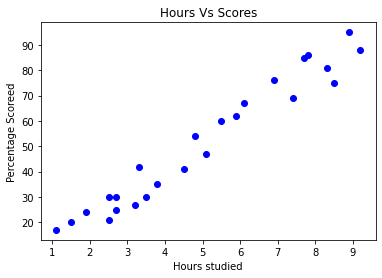

In [24]:
plt.scatter(data['Hours'], data['Scores'], color='Blue',marker='o')
plt.title("Hours Vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Scoreed")
plt.show()

In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
data.columns[data.isnull().any()]
data.isnull().sum().nlargest(1)
column_with_nan=data.columns[data.isnull().any()]
data.shape
#remove rows with missing data
index_with_nan=data.index[data.isnull().any(axis=1)]
index_with_nan.shape
data.drop(index_with_nan,0,inplace=True)
data.shape

(25, 2)

**Splitting data into dependent and independent variables**

In [11]:
x=data.drop(columns=['Scores'])
y=data['Scores']

using Linear Regression

In [12]:
model=LinearRegression()

In [13]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

predict scores

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
#to predict
predict_y=model.predict(xtest)

In [15]:
predicted_data = pd.DataFrame({'Actual':ytest,'Predicted':predict_y})
predicted_data

,Actual,Predicted
5,20,17.147378
2,27,33.766244
19,69,74.824618
16,30,26.923182
11,62,60.160913


**Checking accuracy of model**

In [16]:
print('The Training Score of the model is: ',model.score(xtrain,ytrain))
print('The testing score of the model is: ',model.score(xtest,ytest))

The Training Score of the model is:  0.9512837351709387
The testing score of the model is:  0.9491748734859172


In [17]:
from sklearn import metrics  
from sklearn.metrics import r2_score
print('Mean absolute error:', metrics.mean_absolute_error(ytest, model.predict(xtest))) 
print('r^2 score error:',r2_score(ytest, model.predict(xtest)))

Mean absolute error: 4.071877793635605
r^2 score error: 0.9491748734859172


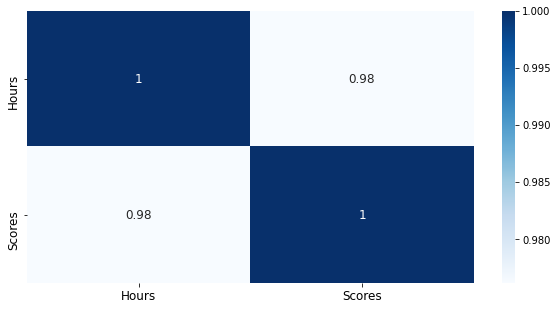

In [23]:
# Checking the correlations
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap="Blues",annot_kws={'fontsize':12})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**What will be predicted score if a student studies for 9.25 hrs/ day?**

Predict using our model

In [25]:
hours=[[9.25]]
predict = model.predict(hours)
print('The no of Hours is: ',hours)
print("The predicted Score for 9.25 hours is: ",predict)

The no of Hours is:  [[9.25]]
The predicted Score for 9.25 hours is:  [92.90985477]



**Conclusion:**

I have successfully predicted that the student who study 9.25 hour will score 92.90 using Supervised Machine Learning